<a href="https://colab.research.google.com/github/JoanwaMaina/Classification-Model/blob/main/Customer_Churn_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Understanding**

**Problem Statement**

Syria Tel is telecommunication
Predict whether a customer will soon stop doing business with SyriaTel.

**Objectives**
Understand the business context: Why is predicting churn important for SyriaTel? What are the potential consequences of failing to retain customers?
*   Identify the main factors that lead to customer churn.
*   Uncover customer behavior patterns leading up to churn events.
*   Build a classifier model that can accurately predict which customers are at risk of churning.
*   Take proactive steps to retain customers who are at risk of churning.

**Measures of success:**

What metrics will you use to evaluate the performance of your classifier (e.g., accuracy, precision, recall, F1-score)?






**Data Understanding**








In [4]:
# Import libraries

# Data manipulation
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score, mean_squared_error

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier



In [5]:
# Data loading

df = pd.read_csv("/content/Telecom churn data.zip")

In [6]:
#Checking the first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False


In [7]:
#Checking the last five rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.20,77,26.55,...,126,18.32,279.10,83,12.56,9.90,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.10,57,39.29,...,55,13.04,191.30,123,8.61,9.60,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.80,109,30.74,...,58,24.55,191.90,91,8.64,14.10,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.80,105,36.35,...,84,13.57,139.20,137,6.26,5.00,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.40,113,39.85,...,82,22.60,241.40,77,10.86,13.70,4,3.70,0,False


In [8]:
#Shape of the dataframe
print("The number of rows: {}".format(df.shape[0]))

print("The number of columns:{}".format(df.shape[1]))

The number of rows: 3333
The number of columns:21


In [9]:
# Looking at the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

**Column description**

**Account_length**:The duration of time in days that the customer has been using the service.

 **Area_code**: Numerical code used to identify specific geographic regions within Syria

 **Phone_number**: The phone number associated with each customer's account.

 **International_plan**: Whether the customer has an international calling plan or not

**Voice_Mail_Plan**:Whether the customer has a voicemail service activated or not

**Number_Vmail_Messages**: The number of voicemail messages received by the customer.

**Total_Day_Minutes**: The total number of minutes the customer used during the day.

**Total_Day_Calls**: The total number of calls made by the customer during the day.

**Total_Day_Charge**: The total charges incurred by the customer for day calls.

**Total_Eve_Minutes**: The total number of minutes the customer used during the evening.

**Total_Eve_Calls**: The total number of calls made by the customer during the evening.

**Total_Eve_Charge**: The total charges incurred by the customer for evening calls.

**Total_Night_Minutes**: The total number of minutes the customer used during the night.

**Total_Night_Calls**: The total number of calls made by the customer during the night.

**Total_Night_Charge**: The total charges incurred by the customer for night calls.

**Total_Intl_Minutes**: The total number of international minutes used by the customer.

**Total_Intl_Calls**: The total number of international calls made by the customer.

**Total_Intl_Charge**: The total charges incurred by the customer for international calls.

**Customer_Service_Calls**: The number of customer service calls made by the customer.

**Churn**: Whether the customer churned (cancelled service) or not, usually represented as "Yes" or "No".

In [10]:
# An overview of the structure and characteristics of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
#check decriptive stats
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


**DATA CLEANING**

In [12]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in this dataset.

In [13]:
# Cleaning up column headings for easier data manipulation
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

This adjustment standardizes the column names and make them easier to work with.


On isnpection of data types, the area code is shown as an integer.
However the values are descriptive. I therefore convert them to an object for improved data integrity.

In [14]:
#converting 'area_code' datatype
df["area_code"] = df["area_code"].astype(object)
df.info() #checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [15]:
# checking for duplicates
df.duplicated().sum()

0

**Checking for outliers**

Use a boxplot

Use the




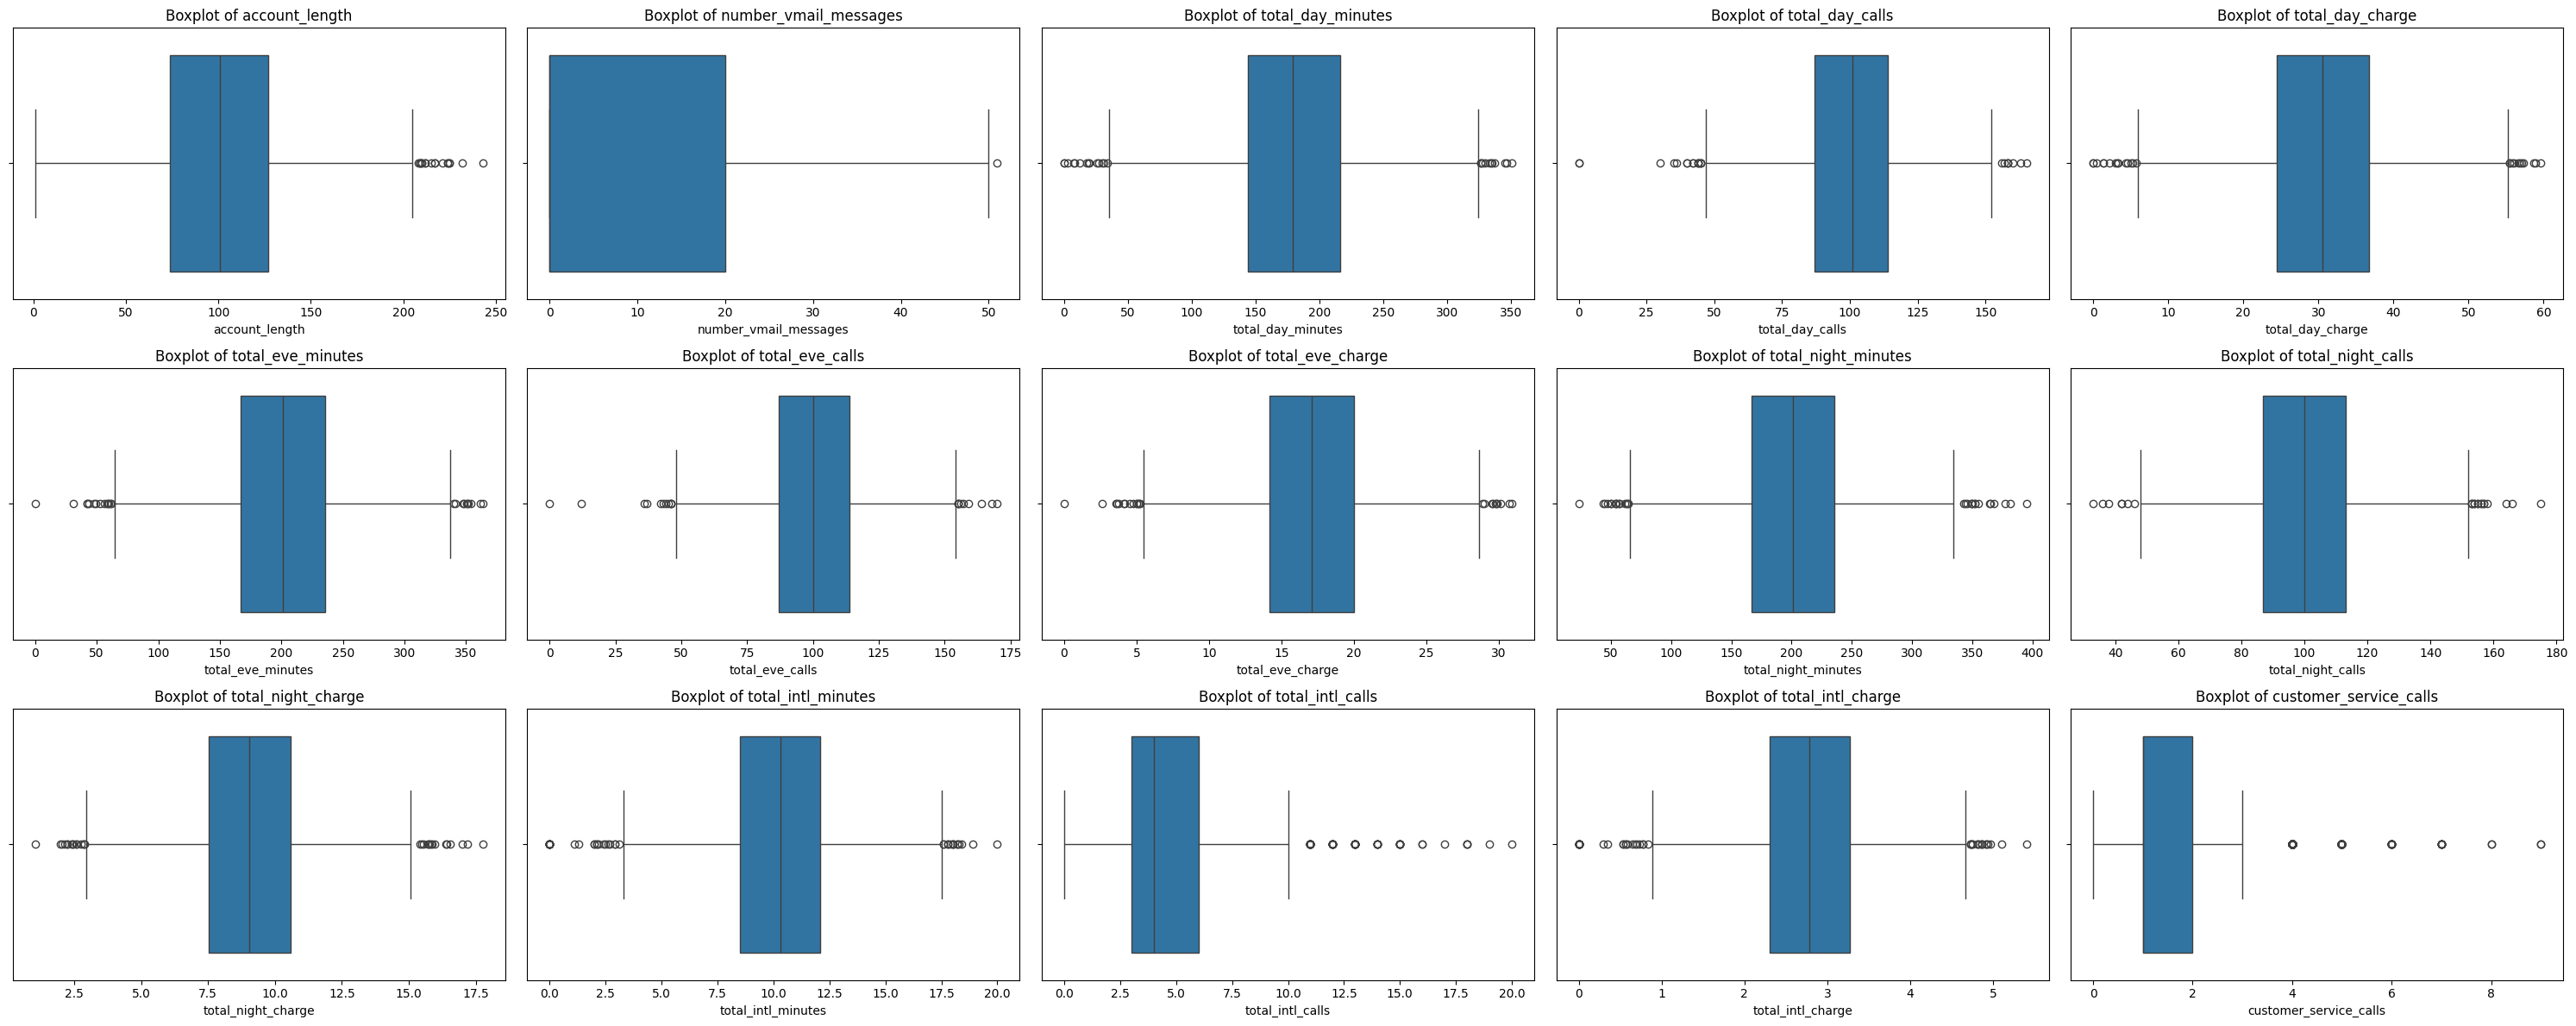

In [16]:
# Checking for outliers in the numerical columns
numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate the number of columns and rows needed for subplots
num_columns = len(numerical_df.columns)
num_rows = (num_columns + 2) // 3  # Round up division to ensure enough space for all columns

# Create subplots with three rows and multiple columns
fig, axes = plt.subplots(3, num_rows, figsize=(6*num_rows, 12))
axes = axes.flatten()  # Flatten axes to simplify indexing

# Plotting boxplots for each numerical column with outliers horizontally
for i, column in enumerate(numerical_df.columns):
    ax = axes[i]
    sns.boxplot(x=numerical_df[column], ax=ax, orient='h')  # horizontal boxplot
    ax.set_title(f'Boxplot of {column}')

# Hide empty subplots
for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# plt.tight_layout()  # Add tight layout
plt.show()

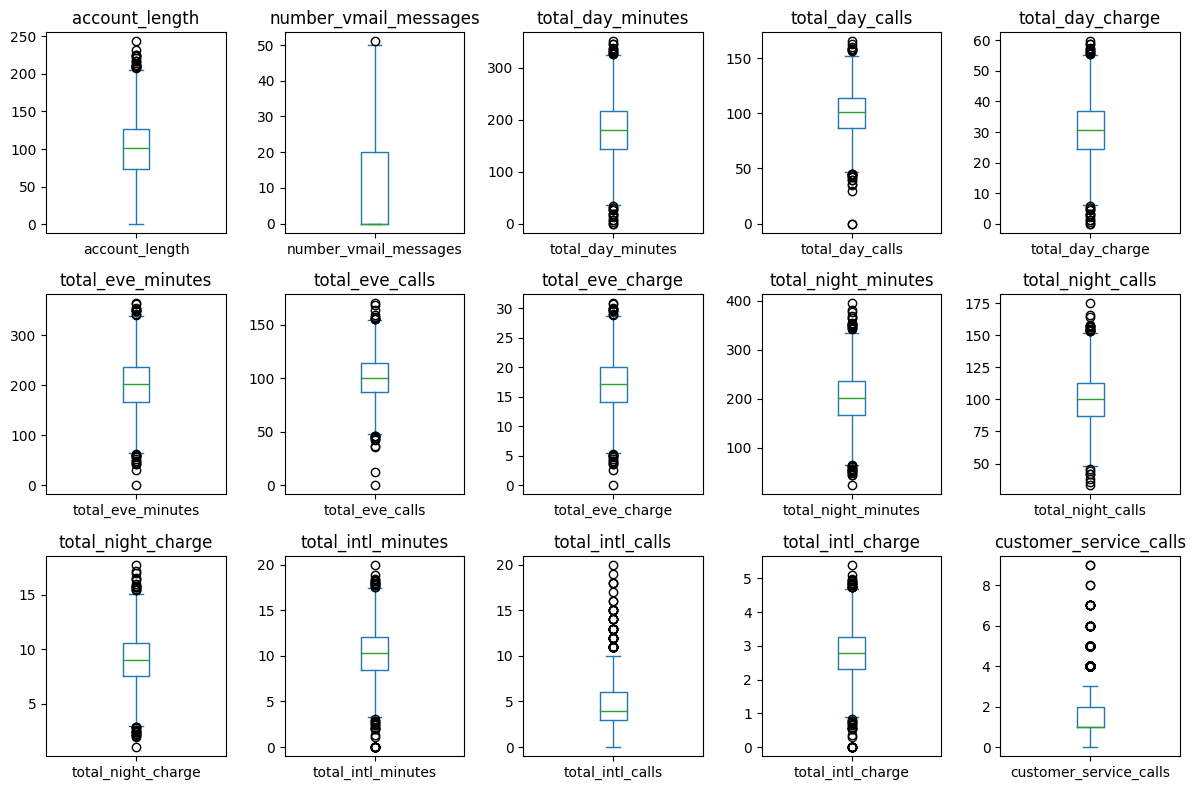

In [17]:
# Checking for outliers in the numerical columns
numerical_df = df.select_dtypes(include=['int', 'float'])

# Calculate the number of columns and rows needed for subplots
num_columns = len(numerical_df.columns)
num_rows = (num_columns) // 3  # Round up division to ensure enough space for all columns

# Create subplots with two rows and multiple columns
fig, axes = plt.subplots(3, num_rows, figsize=(12, 8))
axes = axes.flatten()  # Flatten axes to simplify indexing

# Plotting each numerical column
for i, col in enumerate(numerical_df.columns):
    ax = axes[i]
    numerical_df[col].plot(kind='box', ax=ax)
    ax.set_title(col)

# Hide empty subplots
for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [18]:
#checing for outliers using the IQR method

# Function to identify outliers using IQR
def identify_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column_data[(column_data < lower_bound) | (column_data > upper_bound)]

# Identify outliers for each numerical column
outliers = {column: identify_outliers(numerical_df[column]) for column in numerical_df.columns}

# Display outliers for each numerical column horizontally
for column, outliers_df in outliers.items():
    print(f"Outliers for '{column}':")
    print(outliers_df.values.flatten())
    print()

Outliers for 'account_length':
[208 215 209 224 243 217 210 212 232 225 225 224 212 210 217 209 221 209]

Outliers for 'number_vmail_messages':
[51]

Outliers for 'total_day_minutes':
[332.9 337.4 326.5 350.8 335.5  30.9  34.  334.3 346.8  12.5  25.9   0.
   0.   19.5 329.8   7.9 328.1  27.   17.6 326.3 345.3   2.6   7.8  18.9
  29.9]

Outliers for 'total_day_calls':
[158 163  36  40 158 165  30  42   0  45   0  45 160 156  35  42 158 157
  45  44  44  44  40]

Outliers for 'total_day_charge':
[56.59 57.36 55.51 59.64 57.04  5.25  5.78 56.83 58.96  2.13  4.4   0.
  0.    3.32 56.07  1.34 55.78  4.59  2.99 55.47 58.7   0.44  1.33  3.21
  5.08]

Outliers for 'total_eve_minutes':
[ 61.9 348.5 351.6  31.2 350.5  42.2 347.3  58.9  43.9  52.9  42.5  60.8
  58.6  56.   48.1  60.  350.9  49.2 339.9 361.8 354.2 363.7   0.  341.3]

Outliers for 'total_eve_calls':
[164  46 168  42  37  12 157 155  45  36 156  46  44 155  46  43   0 155
 159 170]

Outliers for 'total_eve_charge':
[ 5.26 29.62 29.8

**Dealing with outliers**

Dropping all the outliers may lead to a loss of valuable information, especially since the outliers are genuine observations.

We only replace the outlier in the voicemail column.
It is only a single extreme entry.
This could be an error in entry given a mean of 8 and a 75 quantile of 20.



In [19]:
# Select the "number_vmail_messages" column
voicemail_column = numerical_df['number_vmail_messages']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = voicemail_column.quantile(0.25)
Q3 = voicemail_column.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median)
median_value = voicemail_column.median()
number_vmail_messages_cleaned = voicemail_column.apply(lambda x: x if lower_bound <= x <= upper_bound else median_value)

# Update the "voicemail" column in the original DataFrame
df['number_vmail_messages'] = number_vmail_messages_cleaned

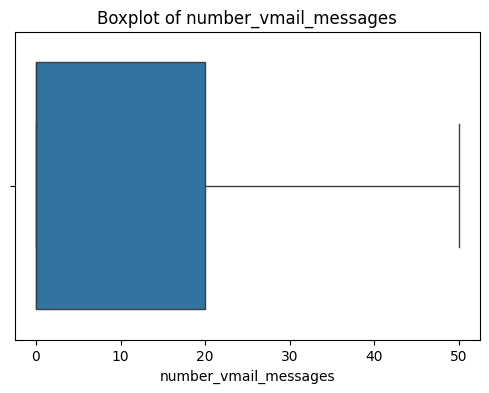

In [20]:
# reinspecting the number_vmail_messages column for outiers
# Plot box plot for number_vmail_messages column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['number_vmail_messages'])
plt.title('Boxplot of number_vmail_messages')
plt.show()

**EDA**

In the EDA section, I explored the following questions:

How long is the average stay of a customer?

Is calling customer service a sign of customer unhappiness/potential churn?

How much are people using their plan? What can this tell us about churn?

Are customers in certain areas more likely to churn?


In [21]:
# Churn Rate = (Number of Churned Customers / Total Number of Customers) *
# Total number of people who churned/didn't churn
#df['churn'].value_counts()

**Exploring account length versus churn**

Will help to understand how the duration of an account's existence relates to the likelihood of churn, where churn refers to customers discontinuing their services with the company.

**Examining the distribution of account lengths for both churned and retained customers**.


In [22]:
# You can create histograms or density plots to visualize these distributions separately.

Interpretation

Understand how long it takes a customer before they unsubscribe


Compare **summary statistics (e.g., mean, median)** of account lengths between churned and retained customers to understand any differences.

In [23]:
df["account_length"].describe()

count   3333.00
mean     101.06
std       39.82
min        1.00
25%       74.00
50%      101.00
75%      127.00
max      243.00
Name: account_length, dtype: float64

**Explore the distribution of account lengths within each plan category.**

This can help you understand if there are any differences in account longevity across plans.

Create visualizations, such as box plots or violin plots, to compare the distribution of account lengths across different plans.
Generate scatter plots or line plots to explore any potential trends or relationships between account length and plan type.

**Statistical Analysis:**

Calculate summary statistics (such as mean, median, standard deviation) of account lengths for each plan category.

Perform statistical tests, such as ANOVA (Analysis of Variance) or t-tests, to determine if there are significant differences in account lengths between different plans.

Interpretation:

Analyze the results of your statistical tests and visualizations to draw conclusions about the relationship between account length and plan type.

Consider any implications for customer retention, loyalty programs, or marketing strategies based on your findings.

**Data preprocessing**

Dealing with data imbalance.

There is a clear class imbalance in our target variable since only 14.49% of the users have churned.